<a href="https://colab.research.google.com/github/comparativechrono/miRNA/blob/main/working_scripts/Count_classified_human_reads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Defining the dictionaries of file paths for both datasets
alignment_files = {
    "MB01": "Galaxy80-[Count_on_data_66_MB01].tabular",
    "MB02": "Galaxy81-[Count_on_data_67_MB02].tabular",
    "MB03": "Galaxy82-[Count_on_data_68_MB03].tabular",
    "MB04": "Galaxy83-[Count_on_data_69_MB04].tabular",
    "MB05": "Galaxy84-[Count_on_data_70_MB05].tabular",
    "VS01": "Galaxy78-[Count_on_data_64_VS01].tabular",
    "VS02": "Galaxy88-[Count_on_data_74_VS02].tabular",
    "VS03": "Galaxy89-[Count_on_data_75_VS03].tabular",
    "VS04": "Galaxy90-[Count_on_data_76_VS04].tabular",
    "VS05": "Galaxy91-[Count_on_data_77_VS05].tabular"
}

miRNA_files = {
    "MB01": "MB01.tsv",
    "MB02": "MB02.tsv",
    "MB03": "MB03.tsv",
    "MB04": "MB04.tsv",
    "MB05": "MB05.tsv",
    "VS01": "VS01.tsv",
    "VS02": "VS02.tsv",
    "VS03": "VS03.tsv",
    "VS04": "VS04.tsv",
    "VS05": "VS05.tsv"
}

def process_alignment_files(file_dict):
    results = {}
    for key, file_path in file_dict.items():
        data = pd.read_csv(file_path, sep="\t", header=None, names=["Count", "Description"])
        total_counts = data['Count'].sum()
        unclassified_count = data.loc[data['Description'] == "unclassified (taxid 0)", 'Count'].values
        unclassified_counts = unclassified_count[0] if unclassified_count.size > 0 else 0
        homo_sapien_count = data.loc[data['Description'] == "Homo sapiens (taxid 9606)", 'Count'].values
        homo_sapien_counts = homo_sapien_count[0] if homo_sapien_count.size > 0 else 0
        homo_sapien_percentage = (homo_sapien_counts / total_counts) * 100 if total_counts > 0 else 0
        unclassified_percentage = (unclassified_counts / total_counts) * 100 if total_counts > 0 else 0
        results[key] = {
            "Total Counts": total_counts,
            "Unclassified Counts": unclassified_counts,
            "Unclassified Percentage": unclassified_percentage,
            "Homo Sapien Counts": homo_sapien_counts,
            "Homo Sapien Percentage": homo_sapien_percentage
        }
    return results

def process_miRNA_files(file_dict):
    results = {}
    for key, file_path in file_dict.items():
        data = pd.read_csv(file_path, sep="\t")
        total_est_counts = data['est_counts'].sum()
        results[key] = round(total_est_counts)
    return results

# Process the files
alignment_results = process_alignment_files(alignment_files)
miRNA_results = process_miRNA_files(miRNA_files)

# Calculate percentages and compile final results
final_results = []
for key in alignment_results:
    details = alignment_results[key]
    miRNA_counts = miRNA_results.get(key, 0)
    miRNA_percentage = (miRNA_counts / details["Homo Sapien Counts"] * 100) if details["Homo Sapien Counts"] > 0 else 0
    final_results.append({
        "Key": key,
        "Total Counts": details["Total Counts"],
        "Unclassified Counts": details["Unclassified Counts"],
        "Unclassified Percentage": details["Unclassified Percentage"],
        "Homo Sapien Counts": details["Homo Sapien Counts"],
        "Homo Sapien Percentage": details["Homo Sapien Percentage"],
        "miRNA Counts": miRNA_counts,
        "miRNA Percentage": miRNA_percentage
    })

# Convert the results list to a DataFrame for better visualization and export
df = pd.DataFrame(final_results)

# Display the DataFrame
print(df)

# Write the DataFrame to a CSV file
output_file_path = "final_results.csv"
df.to_csv(output_file_path, index=False)
print(f"Results have been saved to {output_file_path}")


    Key  Total Counts  Unclassified Counts  Unclassified Percentage  \
0  MB01      25687845              1038701                 4.043551   
1  MB02      20611478               814134                 3.949906   
2  MB03      19812245               223070                 1.125920   
3  MB04      21955489               979716                 4.462283   
4  MB05      21451037              1072117                 4.997973   
5  VS01      21037878               412640                 1.961415   
6  VS02      18141450               286865                 1.581268   
7  VS03      28675835               813870                 2.838174   
8  VS04      22121169               571550                 2.583724   
9  VS05      21945333               422678                 1.926050   

   Homo Sapien Counts  Homo Sapien Percentage  miRNA Counts  miRNA Percentage  
0            15812794               61.557495        114160          0.721947  
1             8583414               41.643855         5025

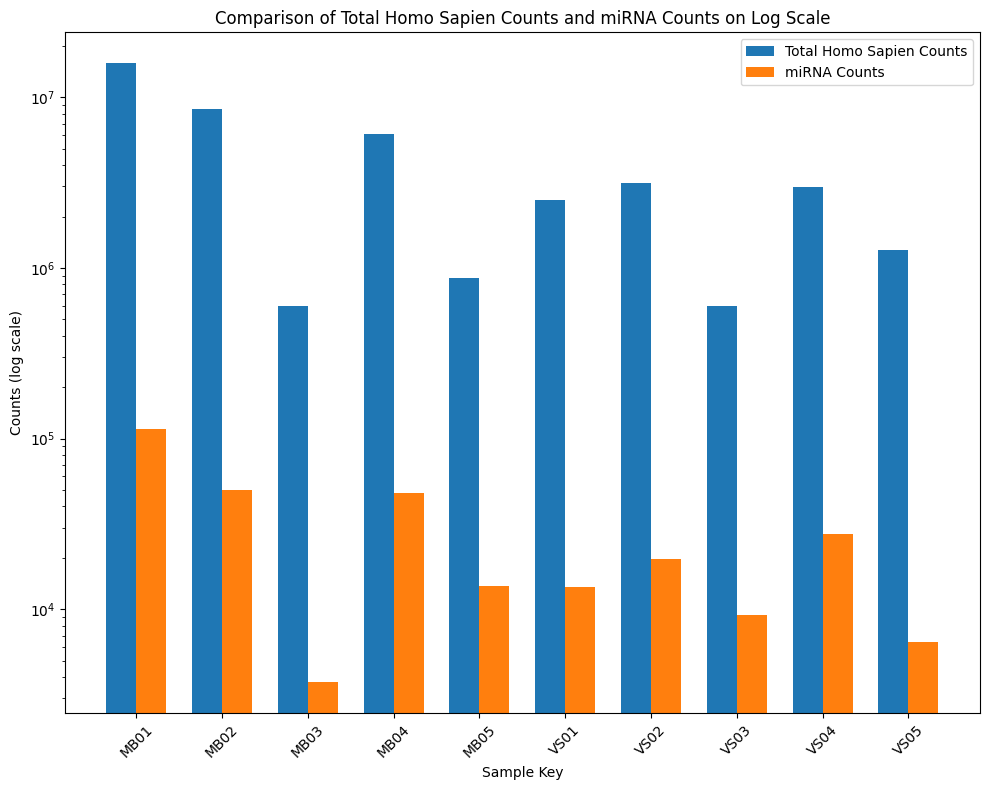

In [ ]:
import matplotlib.pyplot as plt

# Extract data for plotting
keys = df['Key']
total_counts = df['Homo Sapien Counts']
miRNA_counts = df['miRNA Counts']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Index for the position of the bars
index = range(len(keys))

# Bar width
bar_width = 0.35

# Plotting with logarithmic scale
ax.bar(index, total_counts, bar_width, label='Total Homo Sapien Counts')
ax.bar([p + bar_width for p in index], miRNA_counts, bar_width, label='miRNA Counts')

# Adding labels, title, and legend
ax.set_xlabel('Sample Key')
ax.set_ylabel('Counts (log scale)')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(keys)
ax.legend()

# Setting logarithmic scale
ax.set_yscale('log')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


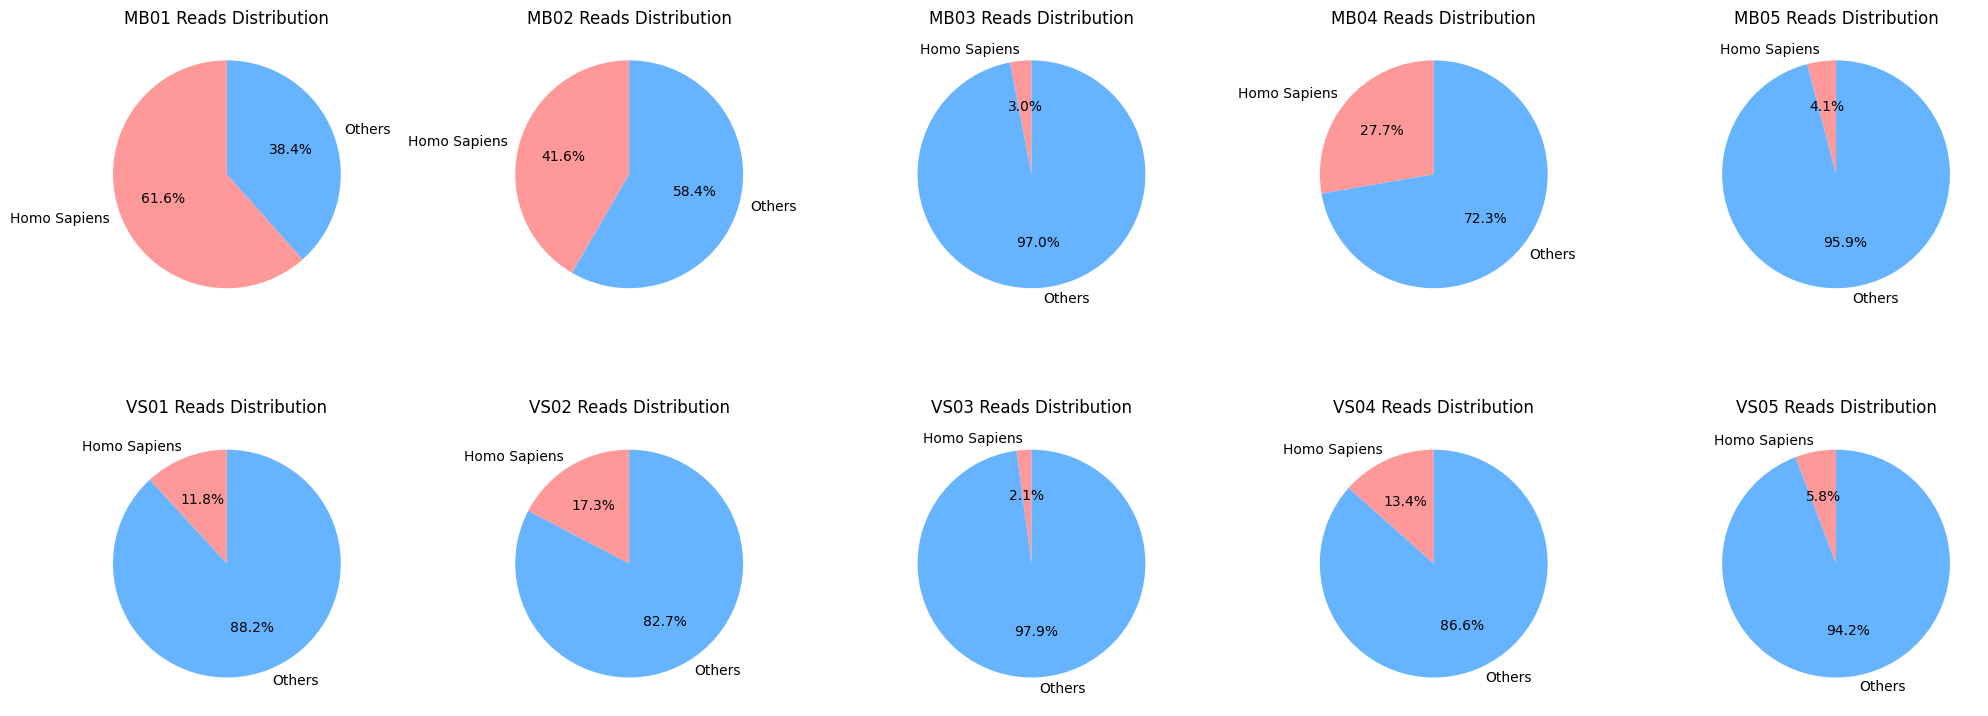

In [ ]:
import matplotlib.pyplot as plt

# Define the function to plot pie charts in a structured format
def plot_grouped_pies(df):
    # Split the dataframe into two groups based on the 'Key' prefixes
    mb_df = df[df['Key'].str.contains('MB')]
    vs_df = df[df['Key'].str.contains('VS')]

    # Set up a subplot grid: 2 rows by 5 columns
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # Adjust size for clarity

    # Function to plot a single pie chart for each data row
    def plot_pie(data, ax):
        labels = ['Homo Sapiens', 'Others']
        homo_sapiens_percentage = data['Homo Sapien Percentage']
        others_percentage = 100 - homo_sapiens_percentage  # Everything else
        sizes = [homo_sapiens_percentage, others_percentage]
        colors = ['#ff9999','#66b3ff']  # Color choices for visibility

        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
        ax.set_title(f"{data['Key']} Reads Distribution")

    # Plot MB samples in the first row
    for ax, (_, row) in zip(axes[0], mb_df.iterrows()):
        plot_pie(row, ax)

    # Plot VS samples in the second row
    for ax, (_, row) in zip(axes[1], vs_df.iterrows()):
        plot_pie(row, ax)

    plt.tight_layout()  # Adjust layout to fit everything nicely
    plt.show()

# Call the function with the DataFrame
plot_grouped_pies(df)


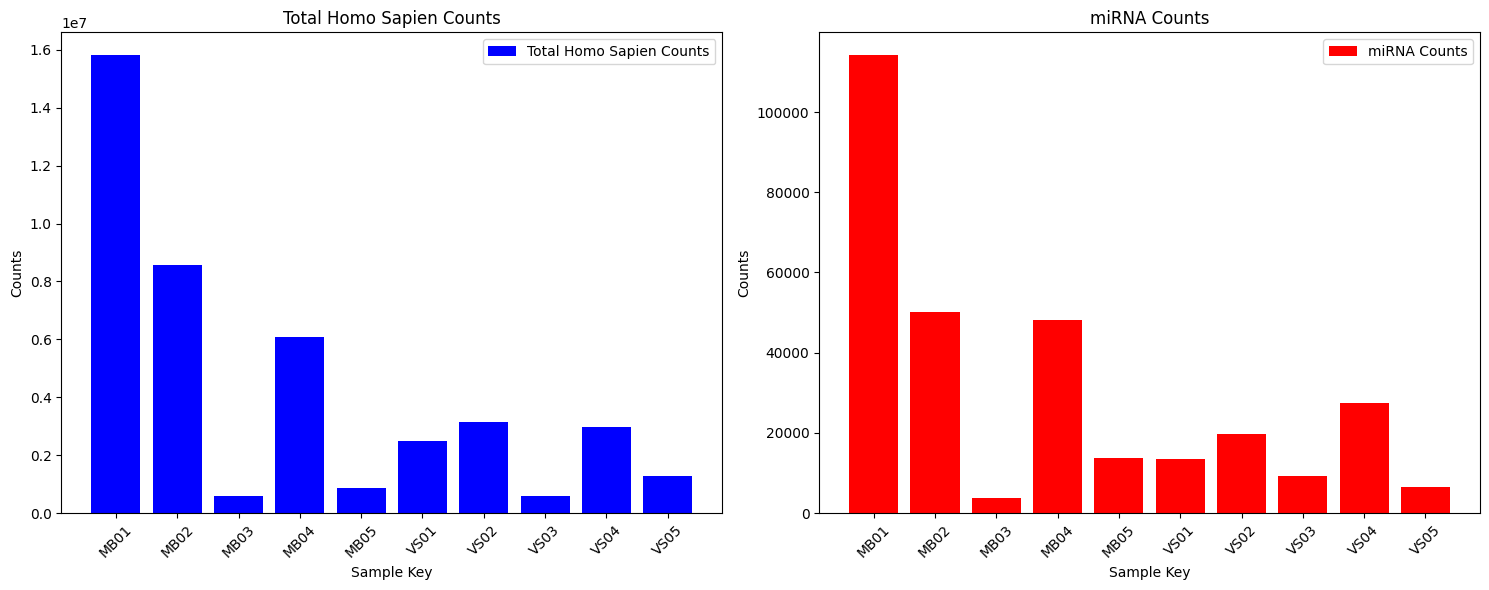

In [ ]:
import matplotlib.pyplot as plt

# Extract data for plotting
keys = df['Key']
total_counts = df['Homo Sapien Counts']
miRNA_counts = df['miRNA Counts']

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

# Plotting on first subplot
ax1.bar(keys, total_counts, color='b', label='Total Homo Sapien Counts')
ax1.set_title('Total Homo Sapien Counts')
ax1.set_xlabel('Sample Key')
ax1.set_ylabel('Counts')
ax1.tick_params(axis='x', rotation=45)

# Plotting on second subplot
ax2.bar(keys, miRNA_counts, color='r', label='miRNA Counts')
ax2.set_title('miRNA Counts')
ax2.set_xlabel('Sample Key')
ax2.set_ylabel('Counts')
ax2.tick_params(axis='x', rotation=45)

# Adding legend
ax1.legend()
ax2.legend()

plt.tight_layout()  # Adjust layout to fit labels
plt.show()
